## Data Preparation

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Read Label CSV file

In [3]:
df = pd.read_csv('sample_dataset/Data_Entry_2017.csv')
df.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


In [4]:
df.columns


Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

### Drop unnecessary Columns

In [5]:
df_data = df.copy(True)
df_data.drop(['Follow-up #', 'Patient ID','Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width','Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'], inplace=True, axis=1)
df_data.head(10)

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_000.png,Hernia
5,00000003_001.png,Hernia
6,00000003_002.png,Hernia
7,00000003_003.png,Hernia|Infiltration
8,00000003_004.png,Hernia
9,00000003_005.png,Hernia


In [7]:
# Set Image Index Colunm as index inorder query row data from image filename
df_data.set_index("Image Index", inplace=True)

In [11]:
# Get all the image filenames
query_image_file = os.listdir('sample_dataset/images/')
len(query_image_file)

15106

In [12]:
# The original Dataset CSV contains 100k+ records but only 10k+ images are available in the images folder.
# So, we need to filter the original dataset to only include the images that are available in the images folder.
df_data = df_data.loc[query_image_file]
print(df_data.shape)
df_data.head(10)

(15106, 1)


,Finding Labels
Image Index,
00001433_003.png,No Finding
00002079_000.png,No Finding
00002955_003.png,No Finding
00026971_023.png,Consolidation|Effusion
00002858_003.png,No Finding
00002631_000.png,No Finding
00003075_000.png,No Finding
00002509_010.png,Pneumothorax
00002227_000.png,No Finding


###  Create A dataframe with all the labels as individual columns
1. Create a dataframe Image ID as column with image path from original dataframe. 
2. Create a zero matrix of shape (N_images, N_labels)
3. Read 'Finding Labels' column from original dataframe.
4. Each Image has multiple findings as finding1|finding2|... splitting the findings by '|'.
5. Map the splitted findings to the corresponding column in the zero matrix as 1.
6. Now Convert the Zero/Binary matrix to a dataframe with labels as colums index.
7. Concatenate the Image ID dataframe with the labels dataframe.

In [13]:
labels = [
    'Pneumonia',
    'Hernia',
    'Fibrosis',
    'Edema',
    'Emphysema',
    'Cardiomegaly',
    'Pleural_Thickening',
    'Consolidation',
    'Pneumothorax',
    'Mass',
    'Nodule',
    'Atelectasis',
    'Effusion',
    'Infiltration',
]

In [15]:
df_data.reset_index(inplace=True) # Reset index to get the image filename as index
new_df = pd.DataFrame(df_data['Image Index'], columns=['Image Index'])
new_df.shape

(15106, 1)

In [16]:
df_data['Finding Labels'][0].split('|')

['No Finding']

In [18]:
# Create a new column for each label in the dataset and set it to 0
binary_labels = np.zeros(shape=(df_data.shape[0],len(labels)), dtype=np.int8)

# Iterate over each row in the dataset and set the corresponding label to 1
for i in range(df_data.shape[0]):
    f_labels = df_data['Finding Labels'][i].split('|')
    for j in range(len(f_labels)):
        if f_labels[j] in labels:
            binary_labels[i][labels.index(f_labels[j])] = 1
print(binary_labels[3])


[0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [19]:
# Convert the binary labels to a dataframe
binary_labels = pd.DataFrame(binary_labels, columns=labels)
binary_labels.head(10)

,Pneumonia,Hernia,Fibrosis,Edema,Emphysema,Cardiomegaly,Pleural_Thickening,Consolidation,Pneumothorax,Mass,Nodule,Atelectasis,Effusion,Infiltration
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Merge the binary labels dataframe with the new_df dataframe
new_df = pd.concat([new_df, binary_labels], axis=1)
new_df.shape

(15106, 15)

In [21]:
new_df.head(10)

,Image Index,Pneumonia,Hernia,Fibrosis,Edema,Emphysema,Cardiomegaly,Pleural_Thickening,Consolidation,Pneumothorax,Mass,Nodule,Atelectasis,Effusion,Infiltration
0,00001433_003.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00002079_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00002955_003.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00026971_023.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,00002858_003.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,00002631_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,00003075_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,00002509_010.png,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,00002227_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,00001930_005.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Save the final dataFrame as CSV file

In [22]:
# Save the new_df dataframe to a csv file
new_df.to_csv('sample_dataset/full_dataset.csv', index=False)

### Plot the data-label Distribution of full dataset

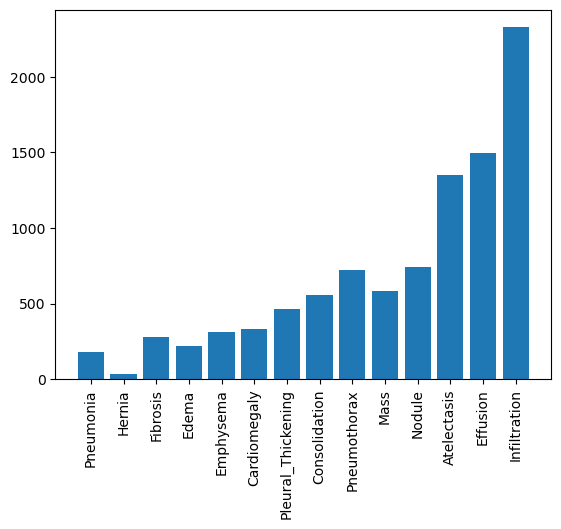

In [23]:
plt.xticks(rotation=90)
plt.bar(new_df.columns[1:], new_df[new_df.columns[1:]].sum(axis=0))
plt.show()

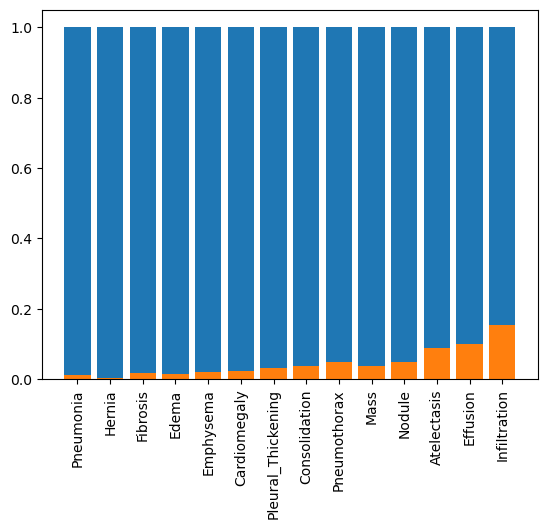

In [24]:
plt.xticks(rotation=90)
plt.bar(new_df.columns[1:], 1)
plt.bar(new_df.columns[1:], new_df[new_df.columns[1:]].mean(axis=0))
plt.show()

### Split full dataset into training, Validation and Testing sets

In [43]:
train_df, valid_df = train_test_split(new_df, test_size=0.10, random_state=11)

In [44]:
train_df, test_df = train_test_split(train_df, test_size=0.20, random_state=11)

In [45]:
print(train_df.shape)
print(test_df.shape)
print(valid_df.shape)

(10272, 15)
(2568, 15)
(2266, 15)


### Plotting the data-label Distribution of Training, Validation and Testing sets

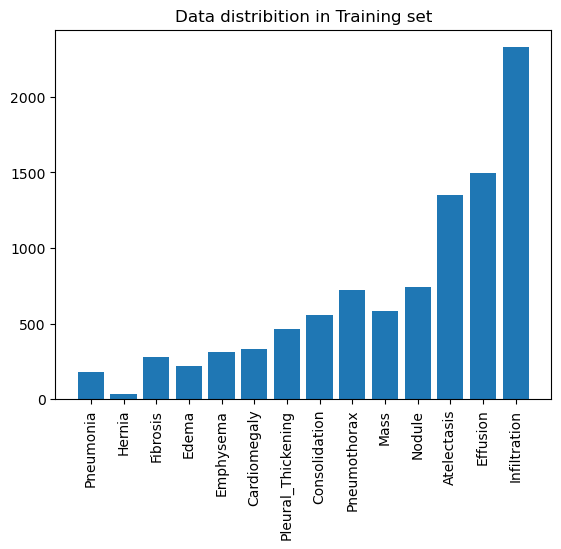

In [47]:
plt.xticks(rotation=90)
plt.bar(train_df.columns[1:], new_df[new_df.columns[1:]].sum(axis=0))
plt.title('Data distribition in Training set')
plt.show()

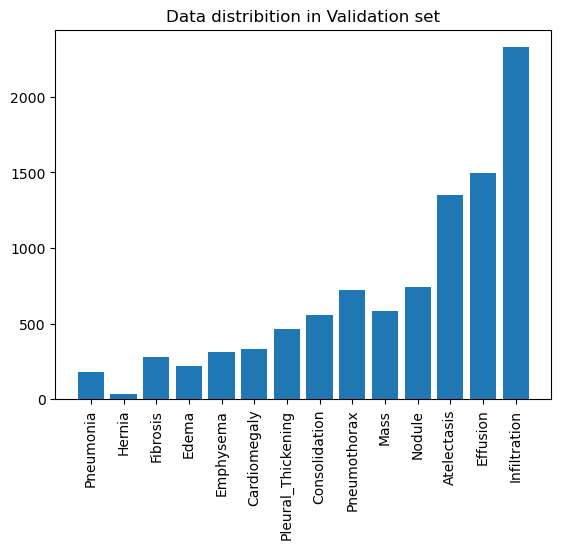

In [48]:
plt.xticks(rotation=90)
plt.bar(valid_df.columns[1:], new_df[new_df.columns[1:]].sum(axis=0))
plt.title('Data distribition in Validation set')
plt.show()

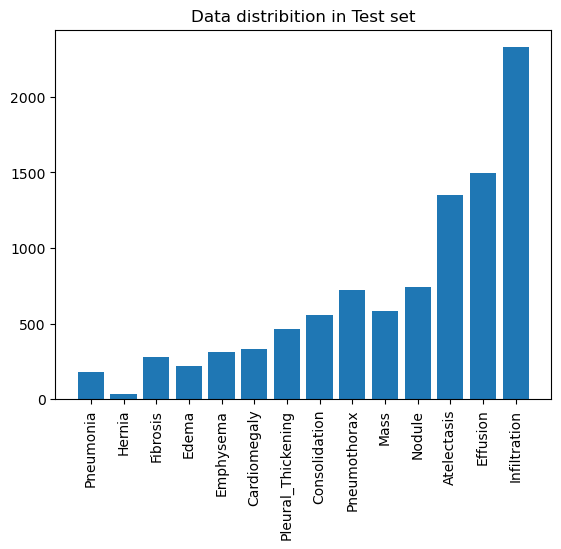

In [49]:
plt.xticks(rotation=90)
plt.bar(test_df.columns[1:], new_df[new_df.columns[1:]].sum(axis=0))
plt.title('Data distribition in Test set')
plt.show()

### Plot some of the images from the training set and their corresponding labels

In [98]:
train_df['Image Index'][train_df[labels[1]] == 1].sample(1).values.tolist()

['00009368_008.png']

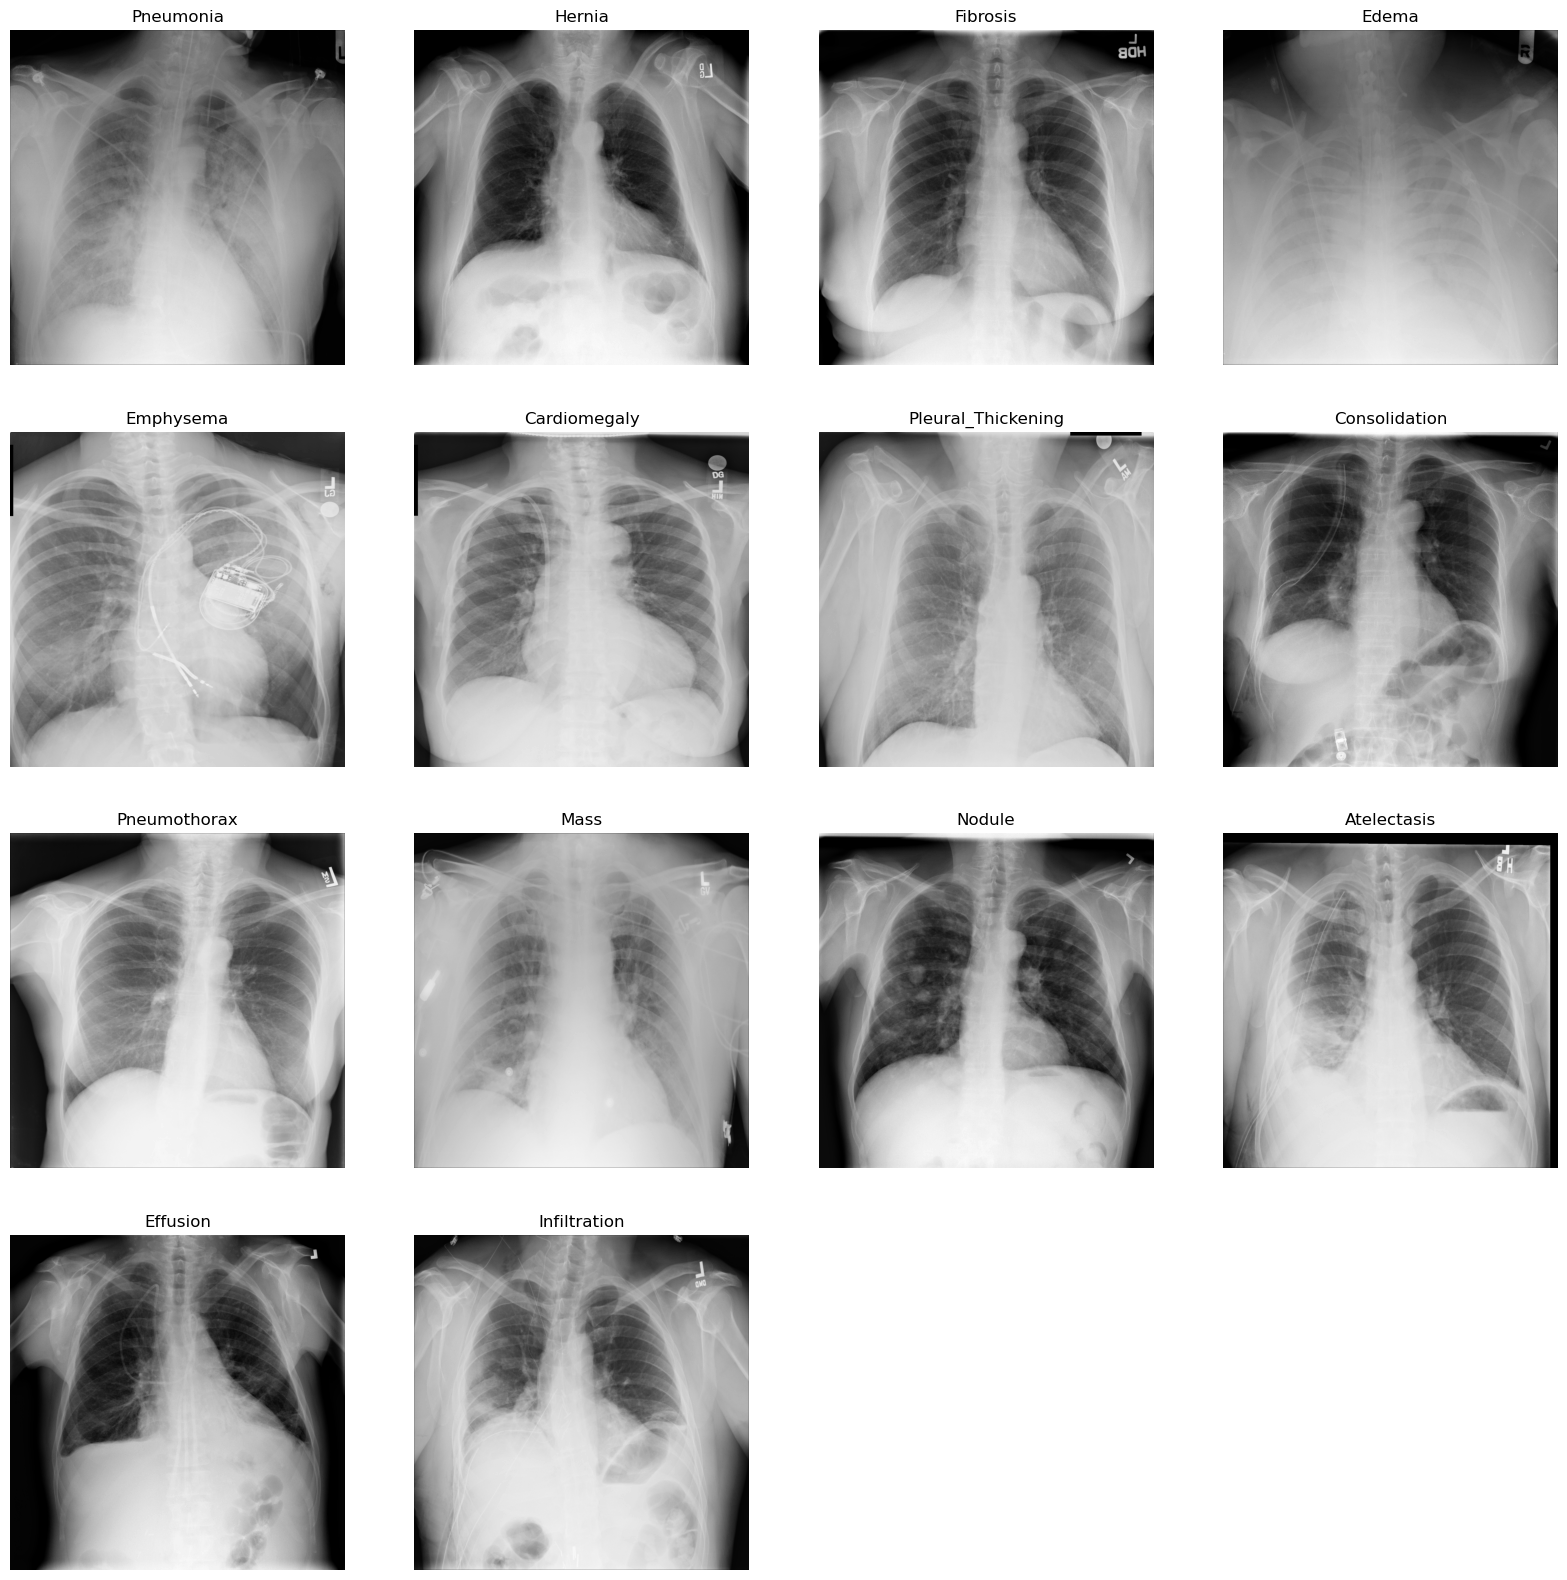

In [102]:

# Plot X-ray images from the training set for each label
fig = plt.figure(figsize=(20,20))
for i in range(len(labels)):
    plt.subplot(4, 4, i+1)
    plt.imshow(plt.imread('sample_dataset/images/' + train_df['Image Index'][train_df[labels[i]] == 1].sample(1).tolist()[0]), cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

### Save the train_df, valid_df and test_df dataframes as CSV files

In [104]:
train_df.to_csv('sample_dataset/train_labels.csv', index=False)

In [105]:
valid_df.to_csv('sample_dataset/valid_labels.csv', index=False)

In [106]:
test_df.to_csv('sample_dataset/test_labels.csv', index=False)